# Statistical Analysis Functions
This notebook contains various Python functions for statistical analysis of datasets. These functions cover:
1. Descriptive Statistics
2. Data Distribution
3. Correlation Analysis
4. Outlier Detection
5. Hypothesis Testing

We will also demonstrate these functions using a sample dataset.

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

## 1. Descriptive Statistics
Let's start by creating functions for calculating descriptive statistics like mean, median, mode, standard deviation, and variance.

In [ ]:
# Function for Descriptive Statistics
def descriptive_stats(data):
    """Calculate descriptive statistics for a given dataset.

    Parameters:
        data (array-like or pd.Series): The dataset for which to calculate statistics.

    Returns:
        dict: A dictionary containing mean, median, mode, standard deviation, and variance.
    """
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data)[0][0]
    std_dev = np.std(data)
    variance = np.var(data)

    return {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Standard Deviation': std_dev,
        'Variance': variance
    }

## 2. Data Distribution
Next, we'll create functions to visualize and analyze the distribution of the data. This will include functions for plotting histograms and calculating skewness and kurtosis.

In [ ]:
# Function for Data Distribution Analysis
def data_distribution(data, bins=10):
    """Visualize and analyze the distribution of the data.

    Parameters:
        data (array-like or pd.Series): The dataset for which to analyze distribution.
        bins (int): Number of bins for the histogram.

    Returns:
        dict: A dictionary containing skewness and kurtosis.
    """
    # Plotting histogram
    plt.hist(data, bins=bins, edgecolor='black')
    plt.title('Data Distribution')
    plt.xlabel('Data')
    plt.ylabel('Frequency')
    plt.show()

    # Calculating Skewness and Kurtosis
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)

    return {
        'Skewness': skewness,
        'Kurtosis': kurtosis
    }

## 3. Correlation Analysis
Now, let's create a function to perform correlation analysis between different variables in the dataset. This will help us understand how different variables are related to each other.

In [ ]:
# Function for Correlation Analysis
def correlation_analysis(data):
    """Perform correlation analysis for a given dataset.

    Parameters:
        data (pd.DataFrame): The dataset for which to perform correlation analysis.

    Returns:
        pd.DataFrame: A correlation matrix.
    """
    # Calculating the correlation matrix
    corr_matrix = data.corr()

    # Plotting the heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    return corr_matrix

## 4. Outlier Detection
Outliers can significantly impact the results of data analysis and statistical modeling. Let's create a function to identify outliers in the dataset using the Z-score method.

In [ ]:
# Function for Outlier Detection using Z-score
def detect_outliers(data, threshold=3):
    """Detect outliers in a given dataset using the Z-score method.

    Parameters:
        data (array-like or pd.Series): The dataset for which to detect outliers.
        threshold (float): The Z-score threshold beyond which data points are considered outliers.

    Returns:
        array-like: Indices of outlier data points.
    """
    z_scores = np.abs(stats.zscore(data))
    outliers = np.where(z_scores > threshold)
    return outliers[0]

## 5. Hypothesis Testing
Finally, let's create a function for hypothesis testing using the t-test. This will help us test if the means of two independent samples are significantly different.

In [ ]:
# Function for Hypothesis Testing using t-test
def hypothesis_testing(data1, data2, alpha=0.05):
    """Perform hypothesis testing using the t-test.

    Parameters:
        data1, data2 (array-like or pd.Series): The datasets for which to perform the t-test.
        alpha (float): Significance level, default is 0.05.

    Returns:
        str: A message indicating whether to reject or fail to reject the null hypothesis.
    """
    t_stat, p_value = ttest_ind(data1, data2)
    if p_value < alpha:
        return f'Reject the null hypothesis. p-value: {p_value}'
    else:
        return f'Fail to reject the null hypothesis. p-value: {p_value}'

## Sample Dataset
Now that we have created the functions, let's generate a sample dataset to demonstrate their usage.

In [ ]:
# Generating a sample dataset
np.random.seed(42)
data1 = np.random.normal(50, 10, 100)  # Normal distribution with mean=50 and std_dev=10
data2 = np.random.normal(60, 10, 100)  # Normal distribution with mean=60 and std_dev=10
data3 = np.random.randint(20, 80, 100)  # Uniform distribution between 20 and 80

# Creating a DataFrame
df = pd.DataFrame({'Data1': data1, 'Data2': data2, 'Data3': data3})
df.head()

## Applying Statistical Functions on Sample Dataset
Let's now apply the statistical functions we created earlier on this sample dataset.

In [ ]:
# Applying Descriptive Statistics function on Data1
descriptive_stats(df['Data1'])

{'Mean': 48.96153482605907,
 'Median': 48.73043708220287,
 'Mode': 23.802548959102555,
 'Standard Deviation': 9.036161766446297,
 'Variance': 81.65221946938584}

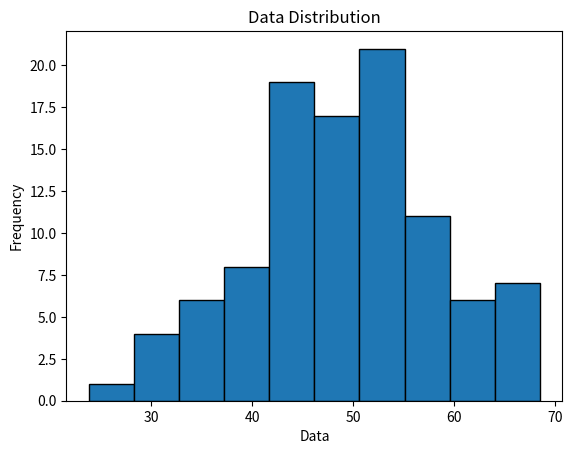

{'Skewness': -0.17526772024434067, 'Kurtosis': -0.15540470774207948}

In [ ]:
# Applying Data Distribution function on Data1
data_distribution(df['Data1'])

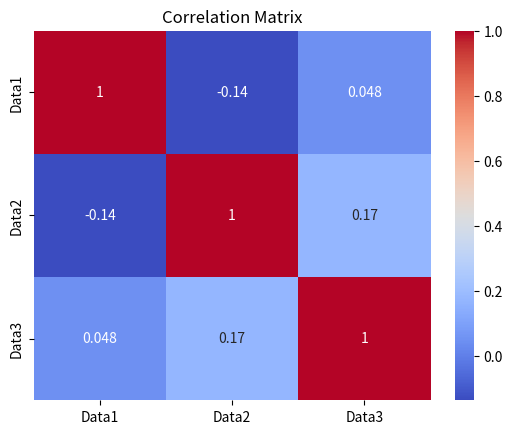

In [ ]:
# Applying Correlation Analysis function on the DataFrame
correlation_analysis(df)

In [ ]:
# Applying Outlier Detection function on Data1
detect_outliers(df['Data1'])

array([], dtype=int64)

In [ ]:
# Applying Hypothesis Testing function on Data1 and Data2
hypothesis_testing(df['Data1'], df['Data2'])

'Reject the null hypothesis. p-value: 3.2929614287039255e-15'

## 6. Filter Data by Date Range
Let's create a function that takes in two columns and a start and end date, and returns a table filtered by the date range.

In [ ]:
# Function to Filter Data by Date Range
def filter_data_by_date(data, date_column, start_date, end_date, column1, column2):
    """Filter a DataFrame by a date range and select specific columns.

    Parameters:
        data (pd.DataFrame): The dataset to filter.
        date_column (str): The name of the date column in the DataFrame.
        start_date (str): The start date in 'YYYY-MM-DD' format.
        end_date (str): The end date in 'YYYY-MM-DD' format.
        column1, column2 (str): The names of the columns to include in the output.

    Returns:
        pd.DataFrame: A DataFrame filtered by the date range and selected columns.
    """
    # Convert date_column to datetime format
    data[date_column] = pd.to_datetime(data[date_column])

    # Filter data by date range
    filtered_data = data[(data[date_column] >= start_date) & (data[date_column] <= end_date)]

    # Select specified columns
    filtered_data = filtered_data[[column1, column2]]

    return filtered_data